In [2]:
import requests as r
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

ImportError: No module named seaborn

In [3]:

data = {}
for year in range(14):
    year = year + 2002
    print year
    res = r.get('http://chicago.bnroths.com/data/eigs-chicago-zillow-opposite-S000/%s/1.json' % year).json()
    
    for a in res['data']:
        if a not in data:
            data[a] = []
        data[a].append(res['data'][a]['real'])

print data
    


2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
{u'Mayfair': [23.9, 22.9, 0.0, 20.9, 23.1, 30.1, 23.0, 23.0, 24.3, 25.6, 25.0, 25.7, 26.2, 25.7], u'Magnolia Glen': [21.6, 21.3, 0.0, 22.2, 21.0, 16.6, 21.9, 13.4, 24.9, 22.3, 22.7, 22.2, 23.1, 23.2], u'Kenwood': [13.8, 12.3, 0.0, 9.8, 12.5, 14.0, 11.8, 13.3, 13.0, 12.0, 13.2, 11.6, 13.2, 13.7], u'Grand Crossing': [48.9, 45.4, 0.0, 49.0, 49.6, 44.9, 50.1, 39.0, 39.7, 38.1, 40.4, 36.5, 40.0, 43.5], u'Jefferson Park': [159.0, 163.9, 0.0, 168.0, 164.4, 187.5, 183.3, 172.7, 180.2, 183.4, 177.7, 181.9, 178.5, 161.9], u'Sauganash Woods': [4.5, 4.8, 0.0, 6.2, 5.5, 6.9, 6.6, 7.1, 6.1, 6.7, 7.2, 6.4, 6.6, 6.2], u'Little Calumet River': [21.7, 23.1, 0.0, 24.2, 23.1, 13.2, 14.8, 18.3, 14.8, 12.2, 11.5, 12.7, 11.3, 13.4], u'Lake View East': [84.4, 91.3, 0.0, 101.5, 107.0, 88.1, 103.8, 78.6, 105.7, 120.0, 112.6, 108.8, 107.0, 109.0], u'East Chatham': [35.3, 34.8, 0.0, 29.3, 28.7, 40.2, 37.2, 42.4, 22.0, 24.5, 27.1, 25.9, 31.2, 35

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(data['Hyde Park'])
#plt.plot(data['Gold Coast'])

ImportError: No module named seaborn

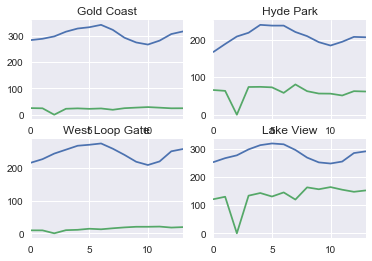

In [12]:
plt.figure(1)
plt.subplot(2,2,1)
for i, hood in enumerate(['Gold Coast', 'Hyde Park', 'West Loop Gate', 'Lake View']):
    plt.subplot(2,2,i+1)
    place = pd.DataFrame({
        'eigenvalues': data[hood], 
        'zillow': list(zillow[zillow.RegionName == hood].values)[0][1:]})
    place['zillow'].plot()
    place['eigenvalues'].plot(title=hood)

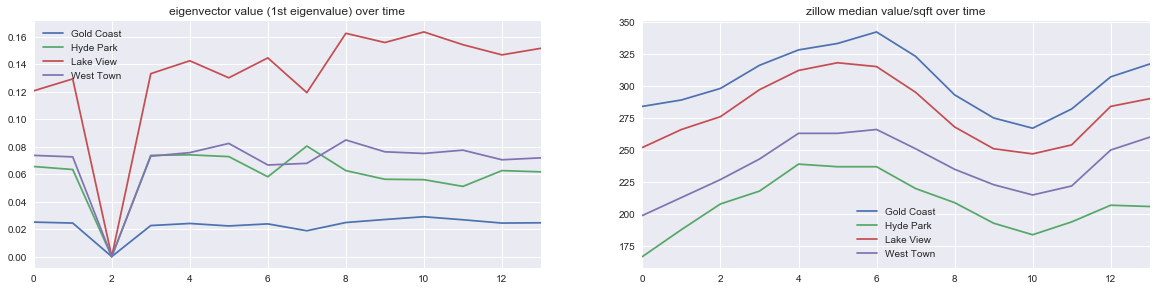

In [13]:
plt.figure(1, figsize=(20,10))
plt.subplot(2,2,1)
hoods = ['Gold Coast', 'Hyde Park', 'West Town', 'Lake View']
place = pd.DataFrame({
    hoods[0]: [x/1000 for x in data[hoods[0]]],
    hoods[1]: [x/1000 for x in data[hoods[1]]],
    hoods[2]: [x/1000 for x in data[hoods[2]]],
    hoods[3]: [x/1000 for x in data[hoods[3]]],
})
place.plot(ax=plt.gca(), title="eigenvector value (1st eigenvalue) over time")
plt.subplot(2,2,2)
place = pd.DataFrame({
    hoods[0]: list(zillow[zillow.RegionName == hoods[0]].values)[0][1:],
    hoods[1]: list(zillow[zillow.RegionName == hoods[1]].values)[0][1:],
    hoods[2]: list(zillow[zillow.RegionName == hoods[2]].values)[0][1:],
    hoods[3]: list(zillow[zillow.RegionName == hoods[3]].values)[0][1:]
})
place.plot(ax=plt.gca(), title="zillow median value/sqft over time")

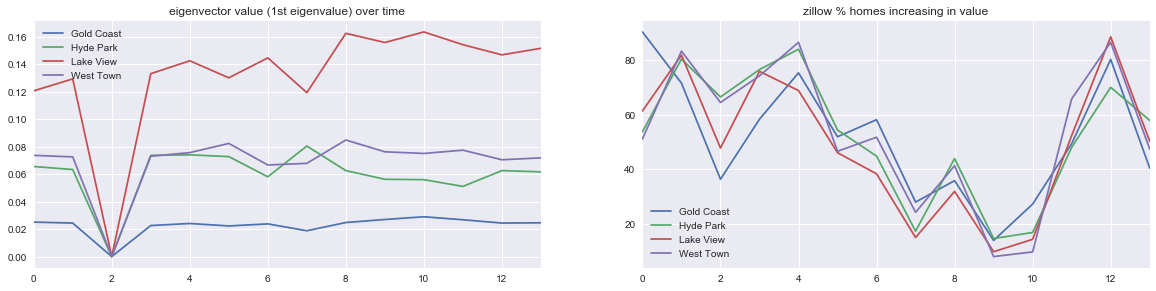

In [19]:
plt.figure(1, figsize=(20,10))
plt.subplot(2,2,1)
hoods = ['Gold Coast', 'Hyde Park', 'West Town', 'Lake View']
place = pd.DataFrame({
    hoods[0]: [x/1000 for x in data[hoods[0]]],
    hoods[1]: [x/1000 for x in data[hoods[1]]],
    hoods[2]: [x/1000 for x in data[hoods[2]]],
    hoods[3]: [x/1000 for x in data[hoods[3]]],
})
place.plot(ax=plt.gca(), title="eigenvector value (1st eigenvalue) over time")
plt.subplot(2,2,2)
place = pd.DataFrame({
    hoods[0]: list(zillow[zillow.RegionName == hoods[0]].values)[0][1:],
    hoods[1]: list(zillow[zillow.RegionName == hoods[1]].values)[0][1:],
    hoods[2]: list(zillow[zillow.RegionName == hoods[2]].values)[0][1:],
    hoods[3]: list(zillow[zillow.RegionName == hoods[3]].values)[0][1:]
})
place.plot(ax=plt.gca(), title="zillow % homes increasing in value")

In [15]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np
# y = np.asarray(place['zillow'])
# x = np.asarray(place['eigenvalues'])
# res = smf.OLS(y, x).fit()
# print(res.summary())

In [108]:
place['eigenvalues']

0      4.6
1     15.6
2     15.2
3     20.9
4     11.4
5      6.0
6      6.7
7      8.1
8      4.8
9      5.2
10     5.3
11     5.6
12     5.7
13     4.8
Name: eigenvalues, dtype: float64

In [120]:
zillow = pd.read_csv('Neighborhood_MedianValuePerSqft_AllHomes.csv')
zillow = zillow[(zillow.City == 'Chicago')][[
    'RegionName',
    '2002-01',
    '2003-01',
    '2004-01',
    '2005-01',
    '2006-01',
    '2007-01',
    '2008-01',
    '2009-01',
    '2010-01',
    '2011-01',
    '2012-01',
    '2013-01',
    '2014-01',
    '2015-01']]

def normal(row):
    return pd.Series(
        [row['RegionName'], 
         row['2002-01']/row['2002-01'],
         row['2003-01']/row['2002-01'],
         row['2004-01']/row['2002-01'],
         row['2005-01']/row['2002-01'],
         row['2006-01']/row['2002-01'],
         row['2007-01']/row['2002-01'],
         row['2008-01']/row['2002-01'],
         row['2009-01']/row['2002-01'],
         row['2010-01']/row['2002-01'],
         row['2011-01']/row['2002-01'],
         row['2012-01']/row['2002-01'],
         row['2013-01']/row['2002-01'],
         row['2014-01']/row['2002-01'],
         row['2015-01']/row['2002-01'],
        ])

zillow = zillow.apply(normal, axis=1).transpose()
zillow = zillow.rename(columns=zillow.iloc[0]).drop(zillow.index[:1])
zillow.head()

,Logan Square,Little Village,West Rogers Park,Albany Park,Archer Heights,Rogers Park,South Austin,Gresham,Lake View,Englewood,...,LeClaire Courts,River West,Pullman,South Commons,Chrysler Village,Parkview,Roscoe Village,Beverly Woods,Forest Glen,Schorsch Forest View
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1.07471,1.10687,1.09639,1.10053,1.1203,1.10759,1.02198,1.10714,1.05556,1.13333,...,1.17647,1.08531,1.12857,1.17054,1.18519,1.03937,1.0439,1.05,1.13107,1.10233
3,1.21264,1.25191,1.1747,1.21693,1.27068,1.20253,1.16484,1.21429,1.09524,1.22667,...,1.36975,1.11374,1.21429,1.16279,1.40741,1.23622,1.09756,1.2,1.21845,1.17674
4,1.36782,1.40458,1.33735,1.40212,1.37594,1.29114,1.20879,1.36905,1.17857,1.4,...,1.53782,1.17536,1.4,1.28682,1.56481,1.34646,1.18049,1.4,1.36893,1.31163
5,1.49425,1.58015,1.40361,1.50265,1.59398,1.37975,1.3956,1.5,1.2381,1.6,...,1.83193,1.2891,1.52857,1.30233,1.64815,1.53543,1.23415,1.525,1.53398,1.43721


In [84]:
def divide(row):
    avg = row.sum()/len(row)
    row = [x/avg for x in row]
    return row

zillow.apply(divide, axis=1)

,Logan Square,Little Village,West Rogers Park,Albany Park,Archer Heights,Rogers Park,South Austin,Gresham,Lake View,Englewood,...,LeClaire Courts,River West,Pullman,South Commons,Chrysler Village,Parkview,Roscoe Village,Beverly Woods,Forest Glen,Schorsch Forest View
1,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,...,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976,1.011976
2,0.999356,1.029259,1.019510,1.023363,1.041748,1.029933,0.950319,1.029513,0.981542,1.053867,...,1.093979,1.009209,1.049439,1.088467,1.102083,0.966492,0.970706,0.976376,1.051760,1.025033
3,1.028292,1.061587,0.996115,1.031927,1.077502,1.019717,0.987751,1.029684,0.928735,1.040183,...,1.161512,0.944427,1.029684,0.986017,1.193446,1.048284,0.930704,1.017570,1.033212,0.997850
4,1.052430,1.080717,1.028988,1.078821,1.058681,0.993433,0.930072,1.053378,0.906821,1.077193,...,1.183231,0.904346,1.077193,0.990111,1.204005,1.035996,0.908295,1.077193,1.053289,1.009197
5,1.048251,1.108512,0.984667,1.054139,1.118216,0.967923,0.979047,1.052283,0.868551,1.122435,...,1.285141,0.904332,1.072327,0.913610,1.156212,1.077140,0.865781,1.069821,1.076121,1.008234
6,1.048912,1.113533,0.993194,1.048231,1.086586,0.974776,1.028901,1.090412,0.856175,1.166983,...,1.231524,0.864980,1.104951,0.999309,1.212466,1.089839,0.847271,1.000756,1.040773,1.012984
7,1.049215,1.087441,0.974804,1.064733,1.050290,0.967264,1.048691,1.169011,0.864410,1.198648,...,1.290077,0.888171,1.066929,1.056054,1.312622,1.045459,0.843327,1.135258,1.067504,1.000303
8,1.050738,1.045268,0.967737,1.056391,1.018046,0.953795,1.084412,1.120139,0.895504,1.203557,...,1.182815,0.906366,1.136531,1.091124,1.204124,0.987839,0.914236,1.070962,1.080617,0.960663
9,1.053651,1.051272,0.990357,0.992798,0.990162,0.947891,1.172861,1.075911,0.915378,1.170591,...,1.056020,0.966790,1.205020,0.980830,1.195457,0.935280,0.986689,1.090256,0.973543,0.900763
10,1.062539,0.945724,1.021891,0.973168,0.967330,0.940936,1.120559,1.134523,0.949217,1.181719,...,0.977024,1.020748,1.143599,0.893898,0.970647,0.922983,1.027380,1.167424,0.985383,0.908674


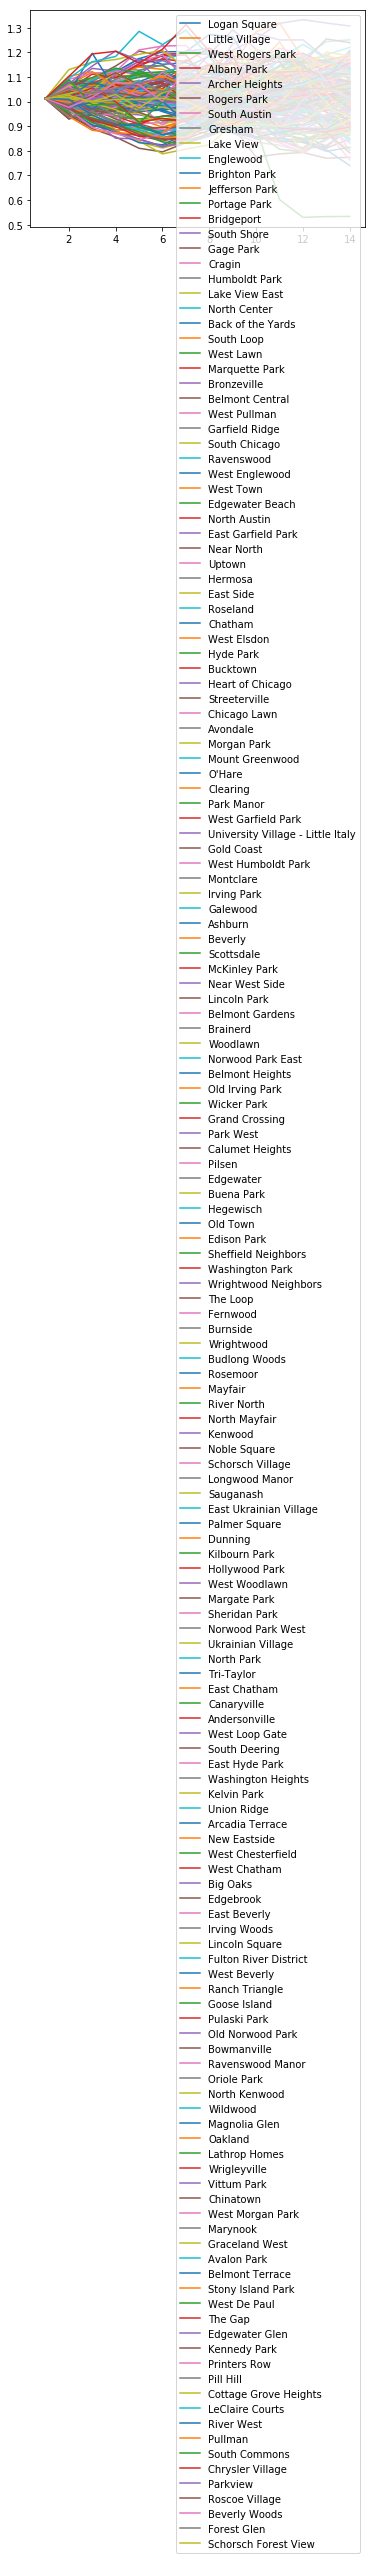

In [85]:
zillow = zillow.apply(divide, axis=1)
zillow.plot()

In [81]:

data = {}
for year in range(14):
    year = year + 2002
    print year
    res = r.get('http://chicago.bnroths.com/data/final-homes-eigs-chicago-S000/%s/1.json' % year).json()
    #print res.content
    
    for a in res['data']:
        if a not in data:
            data[a] = []
        data[a].append(res['data'][a]['real'])

data['Gold Coast']

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


[25.1,
 24.4,
 24.4,
 22.6,
 24.1,
 22.3,
 23.8,
 18.8,
 24.8,
 27.0,
 29.0,
 26.8,
 24.4,
 24.6]

TypeError: list indices must be integers, not str

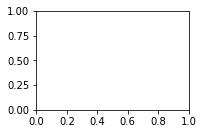

In [80]:
plt.figure(1)
plt.subplot(2,2,1)
for i, hood in enumerate(['Gold Coast', 'Hyde Park', 'West Loop Gate', 'Lake View']):
    plt.subplot(2,2,i+1)
    place = pd.DataFrame({
        'eigenvalues': data[hood], 
        'zillow': [x * 100 for x in list(zillow[hood])]})
    place['zillow'].plot()
    place['eigenvalues'].plot(title=hood)

Albany Park (-0.3991700892591048, 0.15739099169613457)
[[ 1.         -0.39917009]
 [-0.39917009  1.        ]]


Andersonville (0.02503168350248893, 0.9323091613058851)
[[1.         0.02503168]
 [0.02503168 1.        ]]


Arcadia Terrace (0.1301608677824244, 0.6573997170241457)
[[1.         0.13016087]
 [0.13016087 1.        ]]


Archer Heights (-0.08791868133429546, 0.7650391931099342)
[[ 1.         -0.08791868]
 [-0.08791868  1.        ]]


Ashburn (-0.3431131752979332, 0.22974807475810058)
[[ 1.         -0.34311318]
 [-0.34311318  1.        ]]


Avalon Park (0.08705383732226968, 0.7672921188624529)
[[1.         0.08705384]
 [0.08705384 1.        ]]


Avondale (0.03111173152903083, 0.9159152799864305)
[[1.         0.03111173]
 [0.03111173 1.        ]]


Back of the Yards (-0.24758131148060714, 0.39343789803484575)
[[ 1.         -0.24758131]
 [-0.24758131  1.        ]]


Belmont Central (-0.1041295996585347, 0.723146215627142)
[[ 1.        -0.1041296]
 [-0.1041296  1.       ]]


Belmon


Old Irving Park (-0.23950899008377563, 0.4095335417451035)
[[ 1.         -0.23950899]
 [-0.23950899  1.        ]]


Old Norwood Park (0.23492140843265924, 0.4188298679128934)
[[1.         0.23492141]
 [0.23492141 1.        ]]


Old Town (0.24345820607790591, 0.4016170555873834)
[[1.         0.24345821]
 [0.24345821 1.        ]]


Oriole Park (-0.08496905158131034, 0.772730000502089)
[[ 1.         -0.08496905]
 [-0.08496905  1.        ]]


Palmer Square (-0.11637324192124067, 0.6919700752517759)
[[ 1.         -0.11637324]
 [-0.11637324  1.        ]]


Park Manor (0.01403268021118098, 0.9620255602573449)
[[1.         0.01403268]
 [0.01403268 1.        ]]


Park West (0.42849002539512127, 0.12635378819498844)
[[1.         0.42849003]
 [0.42849003 1.        ]]


Pill Hill (-0.18056255949734898, 0.5367561115232367)
[[ 1.         -0.18056256]
 [-0.18056256  1.        ]]


Pilsen (0.1294961011291137, 0.6590526275207027)
[[1.        0.1294961]
 [0.1294961 1.       ]]


Portage Park (-0.069383

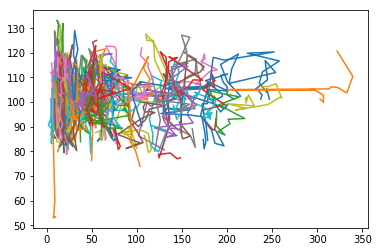

In [90]:
from scipy.stats.stats import pearsonr  
import numpy as np
for hood in sorted(zillow):
    for year in 
    try:
        eigs_data = data[hood]
        zillow_data = [x * 100 for x in list(zillow[hood])]
        print hood, pearsonr(eigs, zillow_data)
        print np.corrcoef(eigs, zillow_data)
        plt.plot(eigs_data, zillow_data)
        print "\n"
    except:
        pass


In [92]:
zillow['Logan Square']

1     1.011976
2     0.999356
3     1.028292
4     1.052430
5     1.048251
6     1.048912
7     1.049215
8     1.050738
9     1.053651
10    1.062539
11    1.059119
12    1.037279
13    1.104603
14    1.207369
Name: Logan Square, dtype: float64

In [93]:
data['Logan Square']

[303.3,
 307.0,
 307.0,
 295.8,
 286.9,
 206.7,
 296.5,
 200.9,
 313.4,
 315.8,
 323.0,
 332.9,
 339.5,
 322.2]

In [131]:
corrMatrix = pd.DataFrame()
print corrMatrix
for hood in sorted(data):   
    # print data[hood]
    # print data[hood]
    for i in range(len(data[hood])):
        row = '%s-%s' % (hood, i)
        # print row, data[hood][i]
        try:
            corrMatrix.at[row, 'eigs'] = data[hood][i]
        except:
            pass
        try:
            corrMatrix.at[row, 'zillow'] = zillow[hood][i+1]
        except:
            pass
  

Empty DataFrame
Columns: []
Index: []


In [132]:
corrMatrix

,eigs,zillow
Albany Park-0,188.9,1.000000
Albany Park-1,194.9,1.100529
Albany Park-2,194.9,1.216931
Albany Park-3,179.3,1.402116
Albany Park-4,172.3,1.502646
Albany Park-5,143.8,1.544974
Albany Park-6,180.6,1.539683
Albany Park-7,132.6,1.380952
Albany Park-8,185.7,1.153439
Albany Park-9,197.5,1.021164


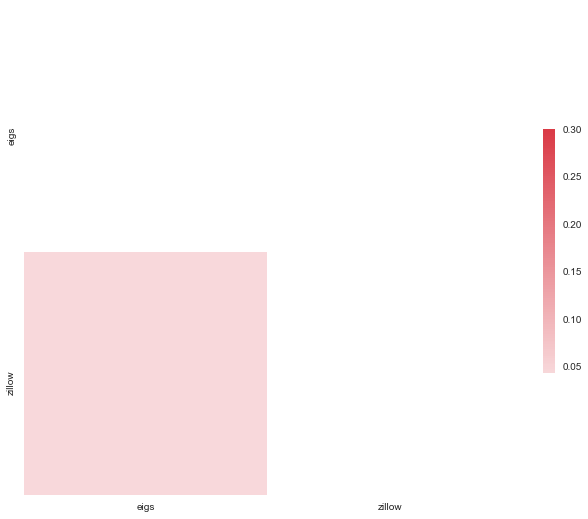

In [134]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Compute the correlation matrix
corr = corrMatrix.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palaette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})